<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#常用函数" data-toc-modified-id="常用函数-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>常用函数</a></span></li><li><span><a href="#神经网络实现鸢尾花分类步骤：" data-toc-modified-id="神经网络实现鸢尾花分类步骤：-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>神经网络实现鸢尾花分类步骤：</a></span></li><li><span><a href="#神经网路优化过程，使用正则化减少过拟合，使用优化器来更新网络参数" data-toc-modified-id="神经网路优化过程，使用正则化减少过拟合，使用优化器来更新网络参数-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>神经网路优化过程，使用正则化减少过拟合，使用优化器来更新网络参数</a></span><ul class="toc-item"><li><span><a href="#相关函数介绍" data-toc-modified-id="相关函数介绍-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>相关函数介绍</a></span></li><li><span><a href="#复杂度和学习率" data-toc-modified-id="复杂度和学习率-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>复杂度和学习率</a></span></li><li><span><a href="#激活函数" data-toc-modified-id="激活函数-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>激活函数</a></span></li><li><span><a href="#损失函数" data-toc-modified-id="损失函数-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>损失函数</a></span></li><li><span><a href="#过拟合和欠拟合" data-toc-modified-id="过拟合和欠拟合-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>过拟合和欠拟合</a></span></li><li><span><a href="#优化器" data-toc-modified-id="优化器-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>优化器</a></span></li></ul></li></ul></div>

# 常用函数

In [81]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [18]:
# 创建张量
# tf.constant(张量内容，dtype = 数据类型)
a=tf.constant([1,5],dtype= tf.float32)
print(a)
print(a.dtype)
print(a.shape)  #结果用逗号隔开几个元素，就是几维

# numpy转换数据类型为tf.tensor：tf.convert_to_tensor(数据名，dtype = 数据类型)
a = np.arange(0,5)
b = tf.convert_to_tensor(a,dtype = tf.float64)

a = tf.ones([2,4])   #中括号里面是维度
s = tf.zeros([2,3])
s = tf.fill([2,3],3)

#正太分布的随机数，默认均值为0，标准差为1
tf.random.normal(维度，mean=均值，stddev = 标准差)
#生成截断式正态分布的随机数，取值在均值加减二倍标准差的范围，
tf.random.truncated_normal(维度，mean=0,stddev = 标准差)
# 均匀分布
tf.random.uniform(维度，minval=最小值，maxval=最大值)

#强制tensor转换数据类型
tf.cast(张量名，dtype = 数据类型)
# 计算最小最大
tf.reduce_min(a,axis = 0)  #不加axis,表示全局最小，加上表示维度最小，0表示跨行，1表示跨列
tf.reduce_max(a) #
tf.reduce_mean(a,axis=0)
tf.reduce_sum(a,axis=0)

#该函数将变量标记为可训练，会在反向传播中记录梯度信息。在神经网络中，该函数用来标记训练参数
tf.Variable(初始值)
tf.Variable(tf.random.normal([2,2],mean=0,stddev=1))

#四则运算,对应元素处理，只有维度相同的张量可以运算
tf.add(a,b),  tf.substract,  tf.multiply,  tf.divide,  
tf.square(a)平方,   tf.pow(a,3)次方,  tf.sqrt开方,  tf.matmul()矩阵乘法


#切分张量传入的第一个维度，生成输入特征和标签对，构建数据集，
# numpy和tensor格式都可以该语句读入数据
data=tf.data.Dataset.from_tensor_slices((输入特征，标签))

#遍历
enumerate(li)一般在for循环中使用，可以遍历列表，元组，字符串中

Tensor("Const_5:0", shape=(2,), dtype=float32)
<dtype: 'float32'>
(2,)


In [20]:
feature = tf.constant([[12,23,10,17],[1,2,3,4],[2,3,4,5],[3,4,5,6]])
labels = tf.constant([0,1,1,0])
dataset = tf.data.Dataset.from_tensor_slices((feature,labels))
print(dataset)
for i,(x,y) in enumerate(dataset):
    print(i,x,y)

<TensorSliceDataset shapes: ((4,), ()), types: (tf.int32, tf.int32)>
0 tf.Tensor([12 23 10 17], shape=(4,), dtype=int32) tf.Tensor(0, shape=(), dtype=int32)
1 tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) tf.Tensor(1, shape=(), dtype=int32)
2 tf.Tensor([2 3 4 5], shape=(4,), dtype=int32) tf.Tensor(1, shape=(), dtype=int32)
3 tf.Tensor([3 4 5 6], shape=(4,), dtype=int32) tf.Tensor(0, shape=(), dtype=int32)


In [16]:
# 计算梯度,实现函数对参数的求导
with tf.GradientTape() as tape:
    w = tf.Variable(tf.constant(3.0))
    loss = tf.pow(w,2)
grad = tape.gradient(loss,w)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


In [22]:
# 独热编码  tf.one_hot(待准换数据，depth=几类) 分类问题中常用独热编码做标签，1为是，0为非
classes = 3
labels = tf.constant([1,0,2])
output = tf.one_hot(labels,depth = classes)
print(output)


tf.Tensor(
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [23]:
# 激活函数  tf.nn.softmax(x)，使得输出符合概率分布,进行了非负数化和归一化
# softmax(yi) = (e^yi)/(sum(e^yi))
y = tf.constant([1.01, 2.01, -0.66])
y_pro = tf.nn.softmax(y)
print('after softmax ,y_pro is : ',y_pro)

after softmax ,y_pro is :  tf.Tensor([0.25598174 0.69583046 0.04818781], shape=(3,), dtype=float32)


In [24]:
# 参数更新  w.assign_sub(num)  w必须是可训练的,相当于减等
w = tf.Variable(4)
w.assign_sub(1)
print(w)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>


In [13]:
a=tf.Variable(tf.constant([3]))
b=int(a)+1
print(b)

4


In [25]:
# 返回最大值索引  tf.argmax(a,axis=0)
test= np.array([[1,2,3],[2,3,4],[5,4,3],[8,7,2]])
print(tf.argmax(test,axis = 0))
print(tf.argmax(test,axis = 1))

tf.Tensor([3 3 1], shape=(3,), dtype=int64)
tf.Tensor([2 2 0 0], shape=(4,), dtype=int64)


In [ ]:
# 函数：str.format() 通过{}和：代替%，

site = {"name": "菜鸟教程", "url": "www.runoob.com"}
print("网站名：{name}, 地址 {url}".format(**site))

my_list = ['菜鸟教程', 'www.runoob.com']
print("网站名：{0[0]}, 地址 {0[1]}".format(my_list))

"{0} {1} ".format("hello", "world")   #可以设置指定位置

# 神经网络实现鸢尾花分类步骤：
    1、数据准备：
        数据读入
        数据集乱序
        生成训练集和测试机
        配对
    2、搭建网络
        定义网络中所有可以训练的参数
    3、参数优化
        嵌套循环迭代，with结构更新参数，显示当前loss
    4、测试效果
        计算当前参数前向传播后的准确率，显示当前acc
    5、acc/loss可视化

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
x_data = load_iris().data   # 返回输入特征
y_data = load_iris().target  #返回数据集标签

x_data = pd.DataFrame(x_data,columns = ['花萼长度','花萼宽度','花瓣长度','花瓣宽度'])
pd.set_option('display.unicode.east_asian_width',True)  #设置列名对其
print('x_data add index:\n',x_data)

x_data['类别'] = y_data
print('x_data add a column: \n',x_data)



x_data add index:
      花萼长度  花萼宽度  花瓣长度  花瓣宽度
0         5.1       3.5       1.4       0.2
1         4.9       3.0       1.4       0.2
2         4.7       3.2       1.3       0.2
3         4.6       3.1       1.5       0.2
4         5.0       3.6       1.4       0.2
..        ...       ...       ...       ...
145       6.7       3.0       5.2       2.3
146       6.3       2.5       5.0       1.9
147       6.5       3.0       5.2       2.0
148       6.2       3.4       5.4       2.3
149       5.9       3.0       5.1       1.8

[150 rows x 4 columns]
x_data add a column: 
      花萼长度  花萼宽度  花瓣长度  花瓣宽度  类别
0         5.1       3.5       1.4       0.2     0
1         4.9       3.0       1.4       0.2     0
2         4.7       3.2       1.3       0.2     0
3         4.6       3.1       1.5       0.2     0
4         5.0       3.6       1.4       0.2     0
..        ...       ...       ...       ...   ...
145       6.7       3.0       5.2       2.3     2
146       6.3       2.5       5.0       

In [82]:
# 1、数据准备
import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_iris
x_data = load_iris().data   # 返回输入特征
y_data = load_iris().target  #返回数据集标签
# 乱序
np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)
# 将数据集分为训练集和测试集
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]
# 配对
train_db = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)


In [83]:
# 2、搭建网络，参数优化
# 定义参数:4个输入特征，，所以输入层为4个节点，结果类为3类，输出层为3个神经元
w1 = tf.Variable(tf.random.truncated_normal([4,3], stddev = 0.1, seed = 1))
b1 = tf.Variable(tf.random.truncated_normal([3],stddev=0.1, seed = 1))

lr = 0.1  #学习率
train_loss_results = []   #记录每轮的loss,为后续画图做准备
test_acc = []  #记录每轮acc
epoch = 500   #循环500轮
loss_all = 0 #每轮分为4step，loss_all记录四个step生成的四个loss


# 嵌套循环迭代，with结构更新参数，显示当前loss
# 训练部分
for epoch in range(epoch):
    for step,(x_train,y_train) in enumerate(train_db):
        x_train = tf.cast(x_train, dtype = w1.dtype)
        with tf.GradientTape() as tape:
            y = tf.matmul(x_train,w1) + b1
            y = tf.nn.softmax(y)
            y_1 = tf.one_hot(y_train, depth=3)
            loss = tf.reduce_mean(tf.square(y_1 - y))
            print(loss)
            loss_all += loss.numpy()
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss,[w1,b1])
        
        
        # 实现梯度更新 
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
    
    print('Epoch: {},loss: {}'.format(epoch,loss_all/4))
    train_loss_results.append(loss_all/4)
    loss_all = 0
    
    # 测试部分
    # total_correct为预测对的样本个数，total_number 为测试的总样本数，将这两个样本都初始化
    total_correct,total_number = 0,0
    for x_test,y_test in test_db:
        
        y = tf.matmul(tf.cast(x_test,dtype=w1.dtype),w1) + b1
        y = tf.nn.softmax(y)
        # 返回最大值的索引，也就是预测的分类
        pred = tf.argmax(y,axis = 1)
        # 将预测值转换为原始数据集格式
        pred = tf.cast(pred,dtype = y_test.dtype)
        # 若分类正确，则correct+1,否则为0，将bool类型转换为int类型
        correct = tf.cast(tf.equal(pred,y_test),dtype = tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct/total_number
    test_acc.append(acc)

    

tf.Tensor(0.33104187, shape=(), dtype=float32)
tf.Tensor(0.28411582, shape=(), dtype=float32)
tf.Tensor(0.28411487, shape=(), dtype=float32)
tf.Tensor(0.2292518, shape=(), dtype=float32)
Epoch: 0,loss: 0.282131090760231
test_acc:  0.16666666666666666
-----------------------------------
tf.Tensor(0.31756583, shape=(), dtype=float32)
tf.Tensor(0.24761875, shape=(), dtype=float32)
tf.Tensor(0.24895136, shape=(), dtype=float32)
tf.Tensor(0.20424862, shape=(), dtype=float32)
Epoch: 1,loss: 0.25459614023566246
test_acc:  0.16666666666666666
-----------------------------------
tf.Tensor(0.27454078, shape=(), dtype=float32)
tf.Tensor(0.22194922, shape=(), dtype=float32)
tf.Tensor(0.2192683, shape=(), dtype=float32)
tf.Tensor(0.18705167, shape=(), dtype=float32)
Epoch: 2,loss: 0.22570249438285828
test_acc:  0.16666666666666666
-----------------------------------
tf.Tensor(0.24604546, shape=(), dtype=float32)
tf.Tensor(0.21204929, shape=(), dtype=float32)
tf.Tensor(0.20379692, shape=(), dtype=fl

Epoch: 28,loss: 0.10724855028092861
test_acc:  0.5333333333333333
-----------------------------------
tf.Tensor(0.11337578, shape=(), dtype=float32)
tf.Tensor(0.089158505, shape=(), dtype=float32)
tf.Tensor(0.11244393, shape=(), dtype=float32)
tf.Tensor(0.10999431, shape=(), dtype=float32)
Epoch: 29,loss: 0.10624313168227673
test_acc:  0.5333333333333333
-----------------------------------
tf.Tensor(0.11227691, shape=(), dtype=float32)
tf.Tensor(0.08828411, shape=(), dtype=float32)
tf.Tensor(0.11137125, shape=(), dtype=float32)
tf.Tensor(0.10918413, shape=(), dtype=float32)
Epoch: 30,loss: 0.10527910105884075
test_acc:  0.5333333333333333
-----------------------------------
tf.Tensor(0.11122581, shape=(), dtype=float32)
tf.Tensor(0.08745032, shape=(), dtype=float32)
tf.Tensor(0.110334046, shape=(), dtype=float32)
tf.Tensor(0.108398706, shape=(), dtype=float32)
Epoch: 31,loss: 0.10435222089290619
test_acc:  0.5333333333333333
-----------------------------------
tf.Tensor(0.11021767, sha

tf.Tensor(0.09126607, shape=(), dtype=float32)
tf.Tensor(0.071874, shape=(), dtype=float32)
tf.Tensor(0.088995636, shape=(), dtype=float32)
tf.Tensor(0.091642246, shape=(), dtype=float32)
Epoch: 59,loss: 0.08594448864459991
test_acc:  0.6
-----------------------------------
tf.Tensor(0.09073623, shape=(), dtype=float32)
tf.Tensor(0.07145783, shape=(), dtype=float32)
tf.Tensor(0.08839955, shape=(), dtype=float32)
tf.Tensor(0.091156036, shape=(), dtype=float32)
Epoch: 60,loss: 0.08543741330504417
test_acc:  0.6
-----------------------------------
tf.Tensor(0.09021426, shape=(), dtype=float32)
tf.Tensor(0.07104715, shape=(), dtype=float32)
tf.Tensor(0.08781134, shape=(), dtype=float32)
tf.Tensor(0.09067532, shape=(), dtype=float32)
Epoch: 61,loss: 0.08493701741099358
test_acc:  0.6
-----------------------------------
tf.Tensor(0.08969995, shape=(), dtype=float32)
tf.Tensor(0.07064176, shape=(), dtype=float32)
tf.Tensor(0.08723086, shape=(), dtype=float32)
tf.Tensor(0.09019996, shape=(), d

tf.Tensor(0.07851399, shape=(), dtype=float32)
tf.Tensor(0.06156906, shape=(), dtype=float32)
tf.Tensor(0.07441522, shape=(), dtype=float32)
tf.Tensor(0.079481415, shape=(), dtype=float32)
Epoch: 88,loss: 0.07349492143839598
test_acc:  0.7666666666666667
-----------------------------------
tf.Tensor(0.078154035, shape=(), dtype=float32)
tf.Tensor(0.061266452, shape=(), dtype=float32)
tf.Tensor(0.07399713, shape=(), dtype=float32)
tf.Tensor(0.079124846, shape=(), dtype=float32)
Epoch: 89,loss: 0.07313561625778675
test_acc:  0.7666666666666667
-----------------------------------
tf.Tensor(0.07779852, shape=(), dtype=float32)
tf.Tensor(0.060966756, shape=(), dtype=float32)
tf.Tensor(0.07358382, shape=(), dtype=float32)
tf.Tensor(0.07877194, shape=(), dtype=float32)
Epoch: 90,loss: 0.0727802598848939
test_acc:  0.7666666666666667
-----------------------------------
tf.Tensor(0.07744736, shape=(), dtype=float32)
tf.Tensor(0.06066994, shape=(), dtype=float32)
tf.Tensor(0.07317523, shape=(), 

tf.Tensor(0.051204357, shape=(), dtype=float32)
tf.Tensor(0.06057075, shape=(), dtype=float32)
tf.Tensor(0.06745456, shape=(), dtype=float32)
Epoch: 129,loss: 0.061503637582063675
test_acc:  0.9333333333333333
-----------------------------------
tf.Tensor(0.06656262, shape=(), dtype=float32)
tf.Tensor(0.0509962, shape=(), dtype=float32)
tf.Tensor(0.060303092, shape=(), dtype=float32)
tf.Tensor(0.067217626, shape=(), dtype=float32)
Epoch: 130,loss: 0.061269884929060936
test_acc:  0.9333333333333333
-----------------------------------
tf.Tensor(0.06634284, shape=(), dtype=float32)
tf.Tensor(0.05078985, shape=(), dtype=float32)
tf.Tensor(0.060038146, shape=(), dtype=float32)
tf.Tensor(0.0669829, shape=(), dtype=float32)
Epoch: 131,loss: 0.061038434505462646
test_acc:  0.9333333333333333
-----------------------------------
tf.Tensor(0.06612546, shape=(), dtype=float32)
tf.Tensor(0.0505853, shape=(), dtype=float32)
tf.Tensor(0.059775874, shape=(), dtype=float32)
tf.Tensor(0.066750415, shape

tf.Tensor(0.059662253, shape=(), dtype=float32)
tf.Tensor(0.044264495, shape=(), dtype=float32)
tf.Tensor(0.051852275, shape=(), dtype=float32)
tf.Tensor(0.059652336, shape=(), dtype=float32)
Epoch: 168,loss: 0.05385783966630697
test_acc:  0.9666666666666667
-----------------------------------
tf.Tensor(0.05951451, shape=(), dtype=float32)
tf.Tensor(0.04411429, shape=(), dtype=float32)
tf.Tensor(0.051667888, shape=(), dtype=float32)
tf.Tensor(0.05948553, shape=(), dtype=float32)
Epoch: 169,loss: 0.053695554845035076
test_acc:  0.9666666666666667
-----------------------------------
tf.Tensor(0.059368193, shape=(), dtype=float32)
tf.Tensor(0.043965265, shape=(), dtype=float32)
tf.Tensor(0.051485132, shape=(), dtype=float32)
tf.Tensor(0.059320126, shape=(), dtype=float32)
Epoch: 170,loss: 0.05353467911481857
test_acc:  0.9666666666666667
-----------------------------------
tf.Tensor(0.059223335, shape=(), dtype=float32)
tf.Tensor(0.04381742, shape=(), dtype=float32)
tf.Tensor(0.051303968,

tf.Tensor(0.05589782, shape=(), dtype=float32)
tf.Tensor(0.04035173, shape=(), dtype=float32)
tf.Tensor(0.04709794, shape=(), dtype=float32)
tf.Tensor(0.055331487, shape=(), dtype=float32)
Epoch: 197,loss: 0.049669744446873665
test_acc:  1.0
-----------------------------------
tf.Tensor(0.05578497, shape=(), dtype=float32)
tf.Tensor(0.040231653, shape=(), dtype=float32)
tf.Tensor(0.04695347, shape=(), dtype=float32)
tf.Tensor(0.05519963, shape=(), dtype=float32)
Epoch: 198,loss: 0.04954243078827858
test_acc:  1.0
-----------------------------------
tf.Tensor(0.055673122, shape=(), dtype=float32)
tf.Tensor(0.04011245, shape=(), dtype=float32)
tf.Tensor(0.04681014, shape=(), dtype=float32)
tf.Tensor(0.05506878, shape=(), dtype=float32)
Epoch: 199,loss: 0.04941612295806408
test_acc:  1.0
-----------------------------------
tf.Tensor(0.05556224, shape=(), dtype=float32)
tf.Tensor(0.03999414, shape=(), dtype=float32)
tf.Tensor(0.04666793, shape=(), dtype=float32)
tf.Tensor(0.054938935, shap

tf.Tensor(0.03580399, shape=(), dtype=float32)
tf.Tensor(0.04166742, shape=(), dtype=float32)
tf.Tensor(0.050363556, shape=(), dtype=float32)
Epoch: 241,loss: 0.04489002097398043
test_acc:  1.0
-----------------------------------
tf.Tensor(0.051646154, shape=(), dtype=float32)
tf.Tensor(0.03571581, shape=(), dtype=float32)
tf.Tensor(0.041562725, shape=(), dtype=float32)
tf.Tensor(0.050267734, shape=(), dtype=float32)
Epoch: 242,loss: 0.0447981059551239
test_acc:  1.0
-----------------------------------
tf.Tensor(0.051567767, shape=(), dtype=float32)
tf.Tensor(0.035628207, shape=(), dtype=float32)
tf.Tensor(0.041458737, shape=(), dtype=float32)
tf.Tensor(0.05017256, shape=(), dtype=float32)
Epoch: 243,loss: 0.04470681771636009
test_acc:  1.0
-----------------------------------
tf.Tensor(0.051489938, shape=(), dtype=float32)
tf.Tensor(0.035541188, shape=(), dtype=float32)
tf.Tensor(0.04135545, shape=(), dtype=float32)
tf.Tensor(0.05007803, shape=(), dtype=float32)
Epoch: 244,loss: 0.0446

tf.Tensor(0.0477479, shape=(), dtype=float32)
Epoch: 271,loss: 0.04238268360495567
test_acc:  1.0
-----------------------------------
tf.Tensor(0.04952307, shape=(), dtype=float32)
tf.Tensor(0.033317972, shape=(), dtype=float32)
tf.Tensor(0.038718622, shape=(), dtype=float32)
tf.Tensor(0.047669124, shape=(), dtype=float32)
Epoch: 272,loss: 0.042307197116315365
test_acc:  1.0
-----------------------------------
tf.Tensor(0.049459618, shape=(), dtype=float32)
tf.Tensor(0.033245537, shape=(), dtype=float32)
tf.Tensor(0.038632706, shape=(), dtype=float32)
tf.Tensor(0.047590837, shape=(), dtype=float32)
Epoch: 273,loss: 0.042232174426317215
test_acc:  1.0
-----------------------------------
tf.Tensor(0.049396593, shape=(), dtype=float32)
tf.Tensor(0.03317353, shape=(), dtype=float32)
tf.Tensor(0.03854731, shape=(), dtype=float32)
tf.Tensor(0.04751305, shape=(), dtype=float32)
Epoch: 274,loss: 0.04215762112289667
test_acc:  1.0
-----------------------------------
tf.Tensor(0.04933399, shape=

Epoch: 301,loss: 0.040306271985173225
test_acc:  1.0
-----------------------------------
tf.Tensor(0.047787298, shape=(), dtype=float32)
tf.Tensor(0.031321123, shape=(), dtype=float32)
tf.Tensor(0.036347758, shape=(), dtype=float32)
tf.Tensor(0.045516584, shape=(), dtype=float32)
Epoch: 302,loss: 0.040243190713226795
test_acc:  1.0
-----------------------------------
tf.Tensor(0.047734868, shape=(), dtype=float32)
tf.Tensor(0.03126033, shape=(), dtype=float32)
tf.Tensor(0.036275446, shape=(), dtype=float32)
tf.Tensor(0.04545124, shape=(), dtype=float32)
Epoch: 303,loss: 0.040180470794439316
test_acc:  1.0
-----------------------------------
tf.Tensor(0.04768273, shape=(), dtype=float32)
tf.Tensor(0.031199893, shape=(), dtype=float32)
tf.Tensor(0.03620353, shape=(), dtype=float32)
tf.Tensor(0.04538629, shape=(), dtype=float32)
Epoch: 304,loss: 0.04011810990050435
test_acc:  1.0
-----------------------------------
tf.Tensor(0.047630925, shape=(), dtype=float32)
tf.Tensor(0.031139767, sha

tf.Tensor(0.029686749, shape=(), dtype=float32)
tf.Tensor(0.034399223, shape=(), dtype=float32)
tf.Tensor(0.043764498, shape=(), dtype=float32)
Epoch: 331,loss: 0.03855870105326176
test_acc:  1.0
-----------------------------------
tf.Tensor(0.046339955, shape=(), dtype=float32)
tf.Tensor(0.029634794, shape=(), dtype=float32)
tf.Tensor(0.0343371, shape=(), dtype=float32)
tf.Tensor(0.04370895, shape=(), dtype=float32)
Epoch: 332,loss: 0.03850519983097911
test_acc:  1.0
-----------------------------------
tf.Tensor(0.04629581, shape=(), dtype=float32)
tf.Tensor(0.029583104, shape=(), dtype=float32)
tf.Tensor(0.03427528, shape=(), dtype=float32)
tf.Tensor(0.043653723, shape=(), dtype=float32)
Epoch: 333,loss: 0.03845197893679142
test_acc:  1.0
-----------------------------------
tf.Tensor(0.046251904, shape=(), dtype=float32)
tf.Tensor(0.029531687, shape=(), dtype=float32)
tf.Tensor(0.03421377, shape=(), dtype=float32)
tf.Tensor(0.043598786, shape=(), dtype=float32)
Epoch: 334,loss: 0.038

tf.Tensor(0.045150395, shape=(), dtype=float32)
tf.Tensor(0.028237449, shape=(), dtype=float32)
tf.Tensor(0.032660764, shape=(), dtype=float32)
tf.Tensor(0.04222034, shape=(), dtype=float32)
Epoch: 361,loss: 0.037067236844450235
test_acc:  1.0
-----------------------------------
tf.Tensor(0.045112457, shape=(), dtype=float32)
tf.Tensor(0.028192764, shape=(), dtype=float32)
tf.Tensor(0.03260696, shape=(), dtype=float32)
tf.Tensor(0.042172894, shape=(), dtype=float32)
Epoch: 362,loss: 0.037021268624812365
test_acc:  1.0
-----------------------------------
tf.Tensor(0.045074727, shape=(), dtype=float32)
tf.Tensor(0.0281483, shape=(), dtype=float32)
tf.Tensor(0.032553393, shape=(), dtype=float32)
tf.Tensor(0.04212571, shape=(), dtype=float32)
Epoch: 363,loss: 0.03697553230449557
test_acc:  1.0
-----------------------------------
tf.Tensor(0.045037165, shape=(), dtype=float32)
tf.Tensor(0.028104028, shape=(), dtype=float32)
tf.Tensor(0.03250009, shape=(), dtype=float32)
tf.Tensor(0.04207874

test_acc:  1.0
-----------------------------------
tf.Tensor(0.043642234, shape=(), dtype=float32)
tf.Tensor(0.026456354, shape=(), dtype=float32)
tf.Tensor(0.03050462, shape=(), dtype=float32)
tf.Tensor(0.04033938, shape=(), dtype=float32)
Epoch: 405,loss: 0.03523564711213112
test_acc:  1.0
-----------------------------------
tf.Tensor(0.043611366, shape=(), dtype=float32)
tf.Tensor(0.02641985, shape=(), dtype=float32)
tf.Tensor(0.030460164, shape=(), dtype=float32)
tf.Tensor(0.040301085, shape=(), dtype=float32)
Epoch: 406,loss: 0.03519811620935798
test_acc:  1.0
-----------------------------------
tf.Tensor(0.043580655, shape=(), dtype=float32)
tf.Tensor(0.026383502, shape=(), dtype=float32)
tf.Tensor(0.030415868, shape=(), dtype=float32)
tf.Tensor(0.04026295, shape=(), dtype=float32)
Epoch: 407,loss: 0.03516074363142252
test_acc:  1.0
-----------------------------------
tf.Tensor(0.043550078, shape=(), dtype=float32)
tf.Tensor(0.026347322, shape=(), dtype=float32)
tf.Tensor(0.03037

tf.Tensor(0.039262954, shape=(), dtype=float32)
Epoch: 435,loss: 0.03417660854756832
test_acc:  1.0
-----------------------------------
tf.Tensor(0.042744596, shape=(), dtype=float32)
tf.Tensor(0.025394365, shape=(), dtype=float32)
tf.Tensor(0.029205695, shape=(), dtype=float32)
tf.Tensor(0.039229497, shape=(), dtype=float32)
Epoch: 436,loss: 0.0341435382142663
test_acc:  1.0
-----------------------------------
tf.Tensor(0.042717535, shape=(), dtype=float32)
tf.Tensor(0.025362343, shape=(), dtype=float32)
tf.Tensor(0.029166361, shape=(), dtype=float32)
tf.Tensor(0.039196204, shape=(), dtype=float32)
Epoch: 437,loss: 0.03411061083897948
test_acc:  1.0
-----------------------------------
tf.Tensor(0.042690586, shape=(), dtype=float32)
tf.Tensor(0.025330449, shape=(), dtype=float32)
tf.Tensor(0.029127166, shape=(), dtype=float32)
tf.Tensor(0.039163038, shape=(), dtype=float32)
Epoch: 438,loss: 0.034077809657901525
test_acc:  1.0
-----------------------------------
tf.Tensor(0.042663734, s

tf.Tensor(0.024235358, shape=(), dtype=float32)
tf.Tensor(0.027774205, shape=(), dtype=float32)
tf.Tensor(0.038031124, shape=(), dtype=float32)
Epoch: 475,loss: 0.032951087690889835
test_acc:  1.0
-----------------------------------
tf.Tensor(0.041740358, shape=(), dtype=float32)
tf.Tensor(0.024207875, shape=(), dtype=float32)
tf.Tensor(0.027740082, shape=(), dtype=float32)
tf.Tensor(0.038002916, shape=(), dtype=float32)
Epoch: 476,loss: 0.03292280761525035
test_acc:  1.0
-----------------------------------
tf.Tensor(0.041717153, shape=(), dtype=float32)
tf.Tensor(0.024180507, shape=(), dtype=float32)
tf.Tensor(0.027706066, shape=(), dtype=float32)
tf.Tensor(0.03797481, shape=(), dtype=float32)
Epoch: 477,loss: 0.03289463371038437
test_acc:  1.0
-----------------------------------
tf.Tensor(0.041694026, shape=(), dtype=float32)
tf.Tensor(0.024153223, shape=(), dtype=float32)
tf.Tensor(0.027672162, shape=(), dtype=float32)
tf.Tensor(0.037946813, shape=(), dtype=float32)
Epoch: 478,loss:

In [48]:
print(train_db)

<BatchDataset shapes: ((None, 4), (None,)), types: (tf.float64, tf.int32)>


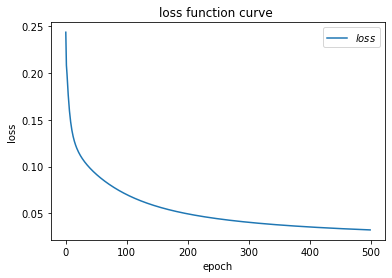

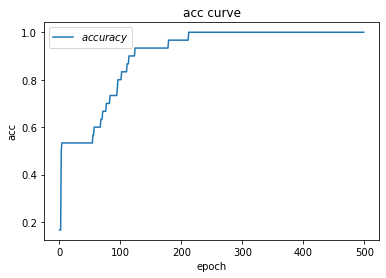

In [63]:
from matplotlib import pyplot as plt
# 绘制loss曲线
plt.title('loss function curve ')  #图标
plt.xlabel('epoch')  #x轴变量名称
plt.ylabel('loss')  #y轴名称
plt.plot(train_loss_results,label = '$loss$')  #逐点画出，并连线
plt.legend()   #画出曲线图标
plt.show()  # 画出图像


# 绘制acc曲线
plt.title('acc curve')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.plot(test_acc,label = '$accuracy$')
plt.legend()
plt.show()
  

# 神经网路优化过程，使用正则化减少过拟合，使用优化器来更新网络参数

预备知识：

    神经网络复杂度
    指数衰减学习率
    激活函数
    损失函数
    欠拟合和过拟合
    正则化减少过拟合
    优化器更新网络参数

## 相关函数介绍

In [86]:
# 相关函数
# tf.where(条件语句，真返回a,假返回b)
# tf.greater(a,b) 判断a是否大于b
a = tf.constant([1,2,3,1,1])
b = tf.constant([0,1,2,4,6])
c = tf.where(tf.greater(a,b),a,b)
print('c:',c)

c: tf.Tensor([1 2 3 4 6], shape=(5,), dtype=int32)


In [87]:
# 返回[0,1)的随机数
# np.random.RandomState.rand(维度)
import numpy as np
rdm = np.random.RandomState(seed=1)
a = rdm.rand()   # 返回标量
b = rdm.rand(2,3)   #返回2*3的随机矩阵
print('a:',a)
print('b:',b)

a: 0.417022004702574
b: [[7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01]]


In [89]:
# 将两个数组按照垂直方向进行叠加
# np.vstack((a,b))  注意两个括号
a = np.array([1,2,3])
b = np.array([2,3,4])
c = np.vstack((a,b))
print('c:',c)

c: [[1 2 3]
 [2 3 4]]


In [99]:
# 网格函数
# x,y = np.mgrid[初始值：结束值：步长，初始值：结束值：步长，。。。]
# x.ravel()   将x变成一维数组，也就是把x拉长
# c = np.c_[x.ravel(),y.ravel()]  # 广播式配对

x,y = np.mgrid[1:3:1,2:4:0.5]
# 本来x是[1,2],y是[2,2.5,3,3.5],但是为了让维度匹配，就需要对维度进行广播，都变成2行4列
print('x:\n',x)
print('y:\n',y)

c = np.c_[x.ravel(),y.ravel()]
print('c:\n',c)

x:
 [[1. 1. 1. 1.]
 [2. 2. 2. 2.]]
y:
 [[2.  2.5 3.  3.5]
 [2.  2.5 3.  3.5]]
c:
 [[1.  2. ]
 [1.  2.5]
 [1.  3. ]
 [1.  3.5]
 [2.  2. ]
 [2.  2.5]
 [2.  3. ]
 [2.  3.5]]


## 复杂度和学习率

In [ ]:
# 神经网络复杂度：多用层数和参数表示：
# 空间复杂度：层数= 隐藏层层数 + 输出层层数
#             总参数=总W + 总b
# 时间复杂度：乘加运算次数 

In [ ]:
# 指数衰减学习率：
# 可以先用较大的学习率，快速得到较优解，然后逐步减小学习率，使得模型在训练后期稳定
# 指数衰减学习率 = 初始学习率* 学习率衰减率（当前轮数/多少轮衰减一次）
lr_base = 0.2
lr_decay = 0.99
lr_step = 1
for epoch in range(epoch):
    lr = lr_base *lr_decay**(epoch/lr_step)
    ...

## 激活函数

In [ ]:
# # 激活函数：

# tf.nn.sigmoid(x)
# f(x) = 1/(1+e^x)   倒S型
# 特点：容易造成梯度消失
#     输出非零均值，收敛较慢
#     幂运算复杂，训练时间较长
 
 
# tf.math.tanh(x)
# f(x) = (1-e^(-2x))/(1+e^(-2x))   倒z型，
# 特点：输出是0均值
#     容易造成梯度消失
#     幂运算复杂，训练时间长
    

# tf.nn.relu(x)
# f(x) = max(x,0)
# 优点：在正区间解决了梯度消失
#     只需要判断输入是否大于0，计算快
#     收敛速度远快于前两个
# 缺点：输出非0均值，收敛慢
#     deadrelu问题：某些神经元可能永远不会被激活，导致相应的参数永远不可能被更新
    
    
# tf.nn.leaky_relu(x)
# f(x) = max(x,ax)
# 理论上讲leaky_relu有relu的所有优点，外加不会有dead_relu的问题，
# 但是实际中，并没有完全证明优于relu


# 初学者建议：
# 首选relu激活函数，
# 学习率设置较小值
# 输入特征标准化，也就是满足以0为均值，1为标准差的正太分布
# 初始参数中心化，即，让随机生成的参数满足0为均值，根号下（2/当前层输入特征个数）为标准差的正太分布


## 损失函数

In [120]:
# 损失函数最小:预测值y和真实值y_的距离
# 损失函数一般有mse,自定义，ce,

# mse:mse = (sum(yi-y_i)^2)/n
#     tf.reduce_mean(tf.square(y-y_))

# ce:交叉熵损失函数(cross entropy)，表示两个概率分布之间的距离,分类的
#     h(y_,y) = -sum(y_*lny)
#     tf.losses.categorical_crossentropy(y_,y)
loss1 = tf.losses.categorical_crossentropy([1,0],[0.6,0.4])
loss2 = tf.losses.categorical_crossentropy([1,0],[0.8,0.2])
print(loss1)
print(loss2)
    
# softmax和交叉熵结合：输出先通过softmax再计算交叉熵损失函数
# tf.nn.softmax_cross_enptropy_with_logits(y_,y)
y_ = np.array([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0]])
y = np.array([[12,3,2],[3,10,1],[1,2,5],[4,6.5,1.2],[3,6,1]])
y_pro = tf.nn.softmax(y)
loss_ce1 = tf.losses.categorical_crossentropy(y_,y_pro)
loss_ce2 = tf.nn.softmax_cross_entropy_with_logits(y_,y)
print('分布计算结果：\n',loss_ce1)
print('结合计算结果：\n',loss_ce2)

tf.Tensor(0.5108256, shape=(), dtype=float32)
tf.Tensor(0.22314353, shape=(), dtype=float32)
分布计算结果：
 tf.Tensor(
[1.68795487e-04 1.03475622e-03 6.58839038e-02 2.58349207e+00
 5.49852354e-02], shape=(5,), dtype=float64)
结合计算结果：
 tf.Tensor(
[1.68795487e-04 1.03475622e-03 6.58839038e-02 2.58349207e+00
 5.49852354e-02], shape=(5,), dtype=float64)


## 过拟合和欠拟合

In [117]:
# 欠拟合和过拟合
# 欠拟合解决办法：
#     增加输入特征，增加网络参数，减少正则化参数
# 过拟合解决方法：
#     数据清洗，增大训练集，采用正则化，增大正则化参数

    
# 正则化：在损失函数中引入模型复杂度指标，利用给w加权值，弱化了训练数据的噪声，
# loss = loss(y,y_) + regularizer*loss(w)
# lossL1 = sum(|wi|)   #L1正则化
# lossL2 = sum(|wi^2|)   #L2正则化
# 正则化的选择：
# L1大概率会使得很多参数变为0，因此可以用来稀疏参数，减少参数数量，降低复杂度
# L2会使参数接近0但不是0，因此可以用来减小值的大小来降低复杂度

# 大概代码结构
with tf.GradientTape() as tape:
    h1 = tf.matmul(x_train,w1)+b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1,w2)+b2
    #均方误差计算损失函数
    loss_mse = tf.reduce_mean(tf.square(y-y_train))
    #添加L2正则化
    loss_regularization = []
    loss_regularization.append(tf.nn.l2_loss(w1))
    loss_regularization.append(tf.nn.l2_loss(w2))
    loss_regularization = tf.reduce_mean(loss_regularization)
    
    loss = loss_mse + 0.03*loss_regularization
#计算梯度
variables = [w1,b1,w2,b2]
grads = tape.gradient(loss,variables)


tf.Tensor(0.5108256, shape=(), dtype=float32)
tf.Tensor(0.22314353, shape=(), dtype=float32)


## 优化器

In [ ]:
5种神经网络优化器


符号申明：待优化参数w,损失函数loss，学习率lr,每次迭代一个batch,t表示当前迭代的总次数
1、计算t时刻梯度：gt = dlt(loss) = loss对w求导
2、计算t时刻一阶动量mt和二阶动量vt
3、计算t时刻下降的梯度：nt=lr*mt/sqrt(vt)
4、计算t+1时刻参数：w(t+1) = wt-nt = wt-(lr*mt/sqrt(vt))
一阶动量：与梯度相关的函数
二阶动量：和梯度平方相关函数
动量相当于惯性，梯度相当于下降速度
5种优化器的本质就是不同的一阶动量和二阶动量


SGD,(不含momentum)随机梯度下降，
mt = gt,   vt = 1
nt = lr*mt/sqrt(vt)=lr*gt
w(t+1) = wt-nt = wt-lr*gt
代码:
w1.assign_sub(lr*grads[0])
b1.assign_sub(lr*grads[1])


SGDM(含momentum的SGD)：在sgd基础上一阶动量发生变化
mt = beta*m(t-1) + (1-beta)*gt，   vt=1  #
nt = lr*mt/sqrt(vt) = lr*(beta*m(t-1)+(1-beta)*gt)
w(t+1) = wt-nt = wt-lr*(beta*m(t-1)+(1-beta)*gt)
代码：
m_w,m_b=0,0
beta=0.9   #beta经验来看是接近于1的数
m_w = beta*m_w + (1-beta)*grads[0]
m_b = beta*m_b + (1-beta)*grads[1]
w1.assign_sub(lr*m_w)
b1.assign_sub(lr*m_b)


Adagrad,在sgd基础上引入二阶动量
mt = gt,   vt = sum(g1^2,g1^2,...gt^2)
nt = lr*mt/sqrt(vt)
w(t+1) = wt-nt = wt - lr*gt/sqrt(sum(g1^2,g1^2,...gt^2))
代码：
v_w,v_b=0,0
v_w += tf.square(grads[0])
v_b += tf.square(grads[1])
w1.assign_sub(lr*grads[0]/tf.sqrt(v_w))
b1.assign_sub(lr*grads[1]/tf.sqrt(v_b))


RMSProp,sgd基础上变动二阶动量
mt = gt,   vt = bate*v(t-1)+(1-beta)*gt^2   #表征过去一段时间的平均值
#各时刻梯度平方的指数滑动平均
nt = lr*mt/sqrt(vt)
w(t+1) = wt-nt = wt-lr*gt/sqrt(beta*v(t-1)+(1-beta)*gt^2)
代码：
v_w,v_b=0,0
beta=0.9
v_w = beta*v_w + (1-beta)*tf.square(grads[0])
v_b = beta*v_b + (1-beta)*tf.square(grads[1])
w1.assign_sub(lr*grads[0]/tf.sqrt(v_w))
b1.assign_sub(lr*grads[1]/tf.sqrt(v_b))


Adam,同时结合SGDM一阶动量和RMSProp二阶动量
mt = beta1*m(t-1) + (1-beta1)*gt，   
修正一阶动量的偏差：mt_hat = mt/(1-beta1^t)
vt = bate2*v(t-1) + (1-beta2)*gt^2   
修正二阶动量的偏差：vt_hat = vt/(1-beta2^t)
nt = lr*mt_hat/sqrt(vt_hat) = lr * (mt/(1-beta1^t)) / sqrt(vt/(1-beta2^t))
w(t+1) = wt-nt = wt - lr * (mt/(1-beta1^t)) / sqrt(vt/(1-beta2^t))
代码：
m_w,m_b,v_w,v_b = 0,0,0,0
beta1,beta2=0.9,0.999
delta -w,delta_b=0,0
global_step=0


m_w = beta1*m_w+(1-beta1)*grads[0]
m_b = beta1*m_b+(1-beta1)*grads[1]
v_w = beta2*v_w+(1-beta2)*tf.square(grads[0])
v_b = beta2*v_b+(1-beta2)*tf.square(grads[1])
m_w_correction = m_w/(1-tf.pow(beta1,int(globel_step)))
m_b_correction = m_b/(1-tf.pow(beta1,int(globel_step)))
v_w_correction = v_w/(1-tf.pow(beta2,int(globel_step)))
v_b_correction = v_b/(1-tf.pow(beta2,int(globel_step)))

w1.assign_sub(lr*m_w_correction/tf.sqrt(v_w_correction))
b1.assign_sub(lr*m_b_correction/tf.sqrt(v_b_correction))

